In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [26]:
# MEMUAT DAN PREPROCESSING DATA
# Muat dataset
df = pd.read_csv("Student Stress Factors.csv")
# Bersihkan nama kolom dari spasi di awal/akhir dan ganti multiple spaces dengan single space
df.columns = df.columns.str.strip().str.replace(r'\s+', ' ', regex=True)

df.head()

,Timestamp,Your Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,What coping strategy you use as a student?,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Rate your academic stress index
0,24/07/2025 22:05:39,undergraduate,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5
1,24/07/2025 22:05:52,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3
2,24/07/2025 22:06:39,undergraduate,1,1,Peaceful,"Social support (friends, family)",No,2,4
3,24/07/2025 22:06:45,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intel...,No,4,3
4,24/07/2025 22:08:06,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,5


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 9 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   Timestamp                                                            140 non-null    object
 1   Your Academic Stage                                                  140 non-null    object
 2   Peer pressure                                                        140 non-null    int64 
 3   Academic pressure from your home                                     140 non-null    int64 
 4   Study Environment                                                    139 non-null    object
 5   What coping strategy you use as a student?                           140 non-null    object
 6   Do you have any bad habits like smoking, drinking on a daily basis?  140 non-null    object
 7   What would you rat

In [28]:
df.nunique()

Timestamp                                                              140
Your Academic Stage                                                      3
Peer pressure                                                            5
Academic pressure from your home                                         5
Study Environment                                                        3
What coping strategy you use as a student?                               3
Do you have any bad habits like smoking, drinking on a daily basis?      3
What would you rate the academic competition in your student life        5
Rate your academic stress index                                          5
dtype: int64

Mulai melatih model KNN...
Model selesai dilatih.

--- Hasil Evaluasi Model ---
Akurasi Model (Accuracy): 0.32

Laporan Klasifikasi (Classification Report):
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         3
           3       0.27      0.50      0.35         6
           4       0.33      0.50      0.40        10
           5       1.00      0.11      0.20         9

    accuracy                           0.32        28
   macro avg       0.32      0.22      0.19        28
weighted avg       0.50      0.32      0.28        28


Confusion Matrix:
[[0 0 0 0 0]
 [1 0 2 0 0]
 [0 0 3 3 0]
 [0 0 5 5 0]
 [0 0 1 7 1]]

Visualisasi Confusion Matrix disimpan sebagai 'confusion_matrix_knn.png'


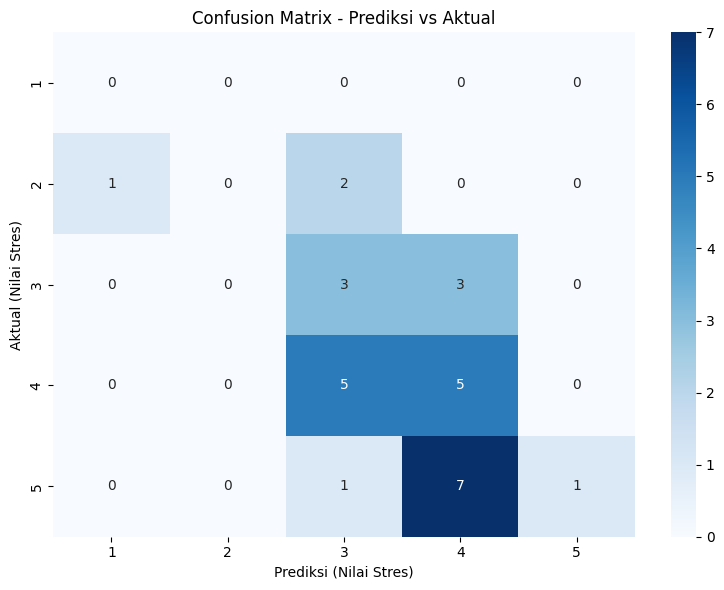

In [29]:
# Tentukan Fitur (X) dan Target (y)
target_column = "Rate your academic stress index"
X = df.drop(columns=[target_column, "Timestamp"])
y = df[target_column]

# Definisikan kolom numerik dan kategorikal
numeric_features = [
    "Peer pressure",
    "Academic pressure from your home",
    "What would you rate the academic competition in your student life"
]
categorical_features = [
    "Your Academic Stage",
    "Study Environment",
    "What coping strategy you use as a student?",
    "Do you have any bad habits like smoking, drinking on a daily basis?"
]

# Buat pipeline untuk preprocessing
# Pipeline untuk data numerik: scaling
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Pipeline untuk data kategorikal: impute (isi data hilang) lalu one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Gabungkan kedua pipeline dengan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# BAGI DATA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MEMBUAT MODEL PIPELINE LENGKAP & LATIH
# model
model = KNeighborsClassifier(n_neighbors=5)

# Redefine preprocessor with corrected column names
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a complete pipeline: 1. Preprocessing, 2. Model
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Latih model
print("Mulai melatih model KNN...")
clf.fit(X_train, y_train)
print("Model selesai dilatih.")

# EVALUASI MODEL
print("\n--- Hasil Evaluasi Model ---")

# Buat prediksi pada data uji
y_pred = clf.predict(X_test)

# Tampilkan Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model (Accuracy): {accuracy:.2f}")

# Tampilkan Laporan Klasifikasi (Sangat Penting!)
# Ini menunjukkan seberapa baik model memprediksi SETIAP kelas (1, 2, 3, 4, 5)
print("\nLaporan Klasifikasi (Classification Report):")
print(classification_report(y_test, y_pred))

# Tampilkan Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualisasikan Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()))
plt.title('Confusion Matrix - Prediksi vs Aktual')
plt.ylabel('Aktual (Nilai Stres)')
plt.xlabel('Prediksi (Nilai Stres)')
plt.tight_layout()
plt.savefig('confusion_matrix_knn.png')
print("\nVisualisasi Confusion Matrix disimpan sebagai 'confusion_matrix_knn.png'")

# Percobaan Ke-2


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

print("Library berhasil dimuat.")

# MEMUAT DATA & REKAYASA TARGET
# Muat dataset
df = pd.read_csv("Student Stress Factors.csv")
df.columns = df.columns.str.strip().str.replace(r'\s+', ' ', regex=True)

# ===== Target > 90% =====
# Kelas 0 = Stres Rendah/Normal (Indeks 1, 2, 3)
# Kelas 1 = Stres Tinggi (Indeks 4, 5)
df['target_biner'] = df['Rate your academic stress index'].apply(lambda x: 1 if x >= 4 else 0)

# Cek distribusi target
print("\nDistribusi Target Baru (Biner):")
print(df['target_biner'].value_counts())

# Tentukan Fitur (X) dan Target (y)
target_column = 'target_biner'
X = df.drop(columns=[target_column, "Rate your academic stress index", "Timestamp"]) # Hapus target lama & baru
y = df[target_column]

# kolom numerik dan kategorikal
numeric_features = [
    "Peer pressure",
    "Academic pressure from your home",
    "What would you rate the academic competition in your student life"
]
categorical_features = [
    "Your Academic Stage",
    "Study Environment",
    "What coping strategy you use as a student?",
    "Do you have any bad habits like smoking, drinking on a daily basis?"
]

# Membuat pipeline preprocessing
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Bagi Data (stratify=y untuk target biner baru)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nData train: {X_train.shape}, Data test: {X_test.shape}")
print(f"Distribusi kelas di y_train:\n{y_train.value_counts(normalize=True).sort_index()}")

# MODELING & TUNING

print("\n--- Memulai Proses Training & Tuning Model (Target Biner) ---")

# Definisikan model-model yang dicoba
models_to_try = {
    'LogisticRegression': {
        'model': LogisticRegression(random_state=42, max_iter=1000),
        'params': {
            'classifier__C': [0.1, 1.0, 10],
            'classifier__solver': ['liblinear']
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [10, 20],
            'classifier__min_samples_leaf': [1, 2]
        }
    },
    'SVM': {
        'model': SVC(probability=True, random_state=42),
        'params': {
            'classifier__C': [0.1, 1.0, 10],
            'classifier__gamma': ['scale', 'auto'],
            'classifier__kernel': ['rbf', 'linear']
        }
    }
}

best_model_name = ""
best_model_obj = None
best_accuracy = 0.0

# Loop, latih, dan tuning setiap model
for name, config in models_to_try.items():
    print(f"\n--- Melatih {name} ---")
    # Membuat pipeline lengkap: Preprocessing -> SMOTE -> Classifier
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', config['model'])
    ])

    # GridSearch
    grid = GridSearchCV(pipe, config['params'], cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
    grid.fit(X_train, y_train)

    # Evaluasi di data test
    y_pred = grid.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred)

    print(f"Hasil {name} (CV Terbaik): {grid.best_score_:.4f}")
    print(f"HASIL AKURASI {name} DI DATA TEST: {accuracy_test:.4f}")

    # Simpan model terbaik
    if accuracy_test > best_accuracy:
        best_accuracy = accuracy_test
        best_model_name = name
        best_model_obj = grid.best_estimator_

# EVALUASI MODEL TERBAIK (TARGET > 90%)
print(f"\n========================================================")
print(f"MODEL TERBAIK ADALAH: {best_model_name}")
print(f"AKURASI TEST TERTINGGI: {best_accuracy:.4f}")
print(f"========================================================")

# Tampilkan Laporan Klasifikasi detail untuk model terbaik
print("\nLaporan Klasifikasi Model Terbaik:")
y_pred_best = best_model_obj.predict(X_test)
print(classification_report(y_test, y_pred_best, target_names=['Stres Rendah (0)', 'Stres Tinggi (1)']))

# Visualisasikan Confusion Matrix
print("\nConfusion Matrix Model Terbaik:")
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Stres Rendah', 'Stres Tinggi'],
            yticklabels=['Stres Rendah', 'Stres Tinggi'])
plt.title('Confusion Matrix - Prediksi vs Aktual')
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()

# SIMPAN MODEL UNTUK DEPLOYMENT
joblib.dump(best_model_obj, 'model_stres_biner_terbaik.joblib')
print(f"\nModel terbaik ({best_model_name}) telah disimpan sebagai 'model_stres_biner_terbaik.joblib'")

# Percobaan Ke-3

Semua library berhasil dimuat.
Berhasil mengganti nama kolom.

--- MULAI ANALISIS DATA EKSPLORATIF (EDA) ---

[UNTUK TABEL 1: Contoh 5 Baris Data Awal]
   Sleep_Quality  Headaches_per_week  Academic_Performance  Study_Load  \
0              3                   1                     3           4   
1              4                   1                     2           3   
2              2                   1                     2           1   
3              3                   2                     3           2   
4              2                   3                     1           5   

   Extracurricular_Activities  Stress_Level  
0                           2             3  
1                           3             2  
2                           4             4  
3                           3             3  
4                           5             3  

[UNTUK TABEL 2: Contoh 5 Baris Data (Setelah Rekayasa Target)]
   Sleep_Quality  Headaches_per_week  Academic_Performance  Stu

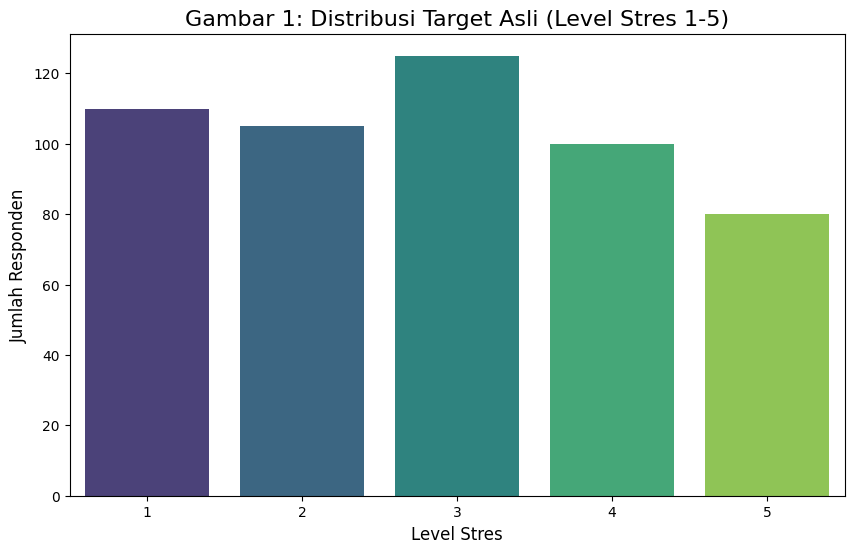


Membuat Gambar 2: Distribusi Target Biner (Untuk Model)...


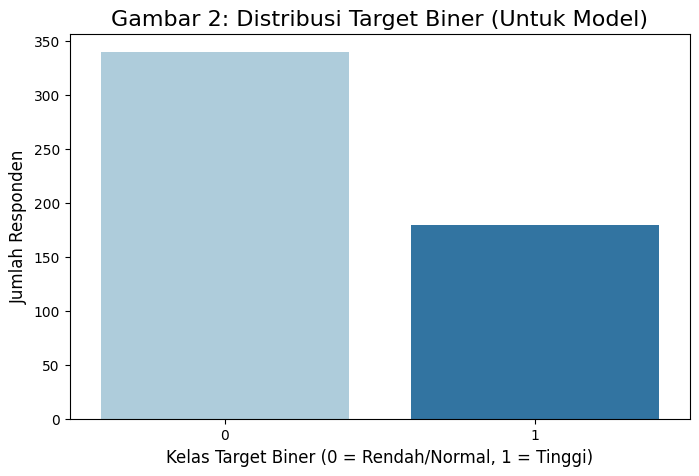


Membuat Gambar 3: Histogram untuk setiap fitur...


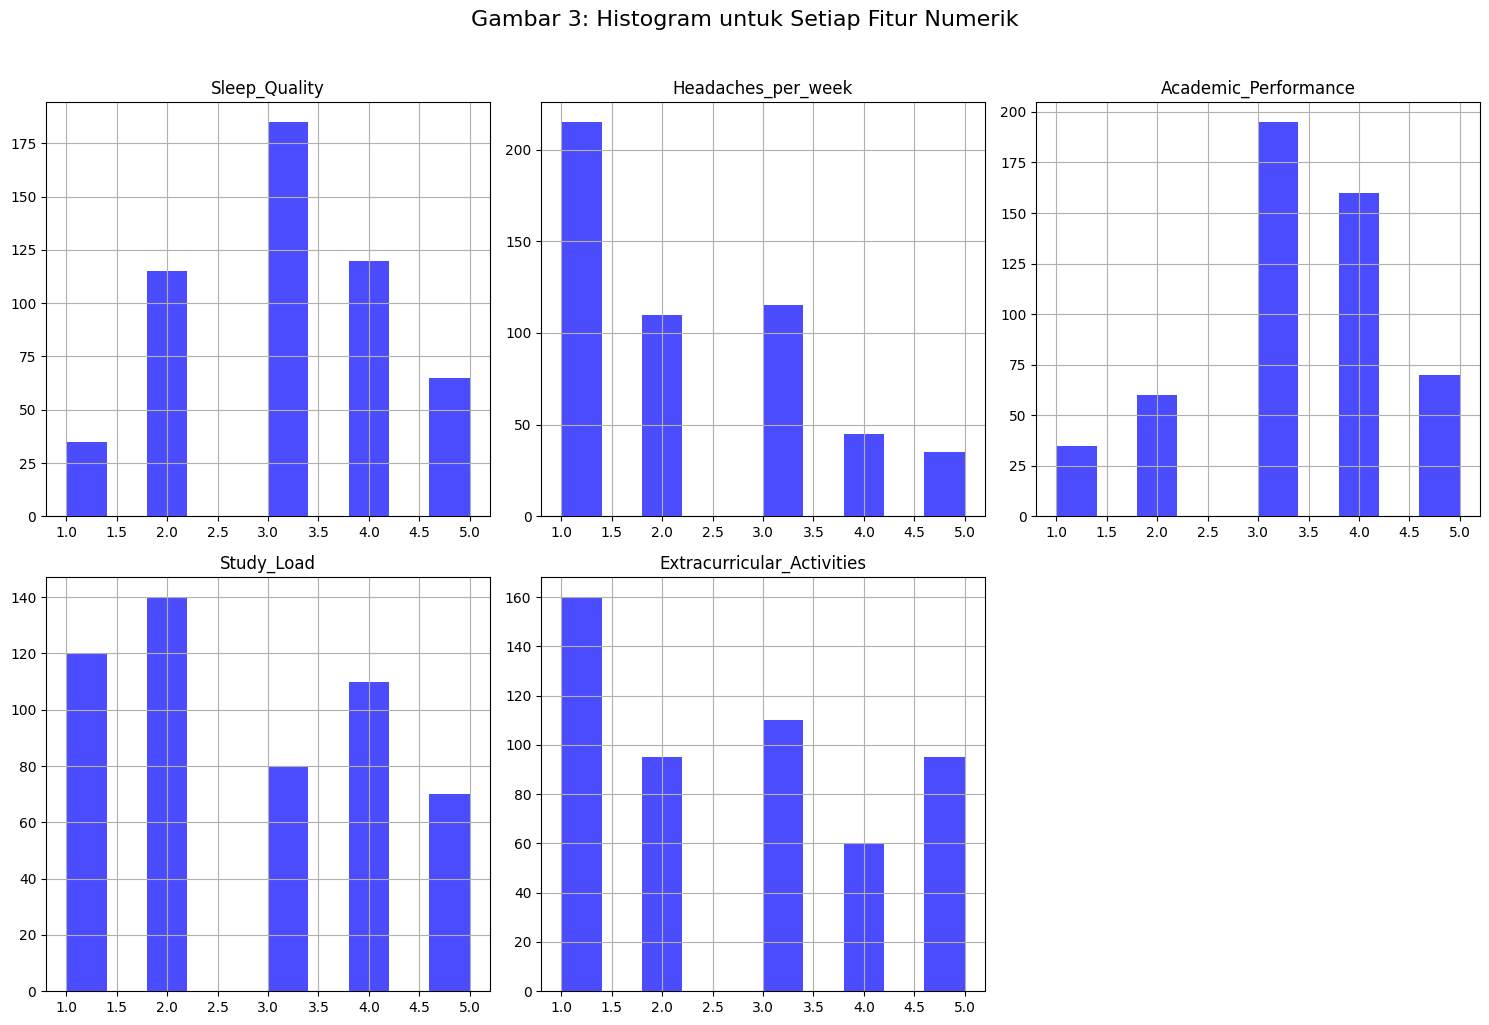


Membuat Gambar 4: Peta Korelasi (Heatmap) Fitur...


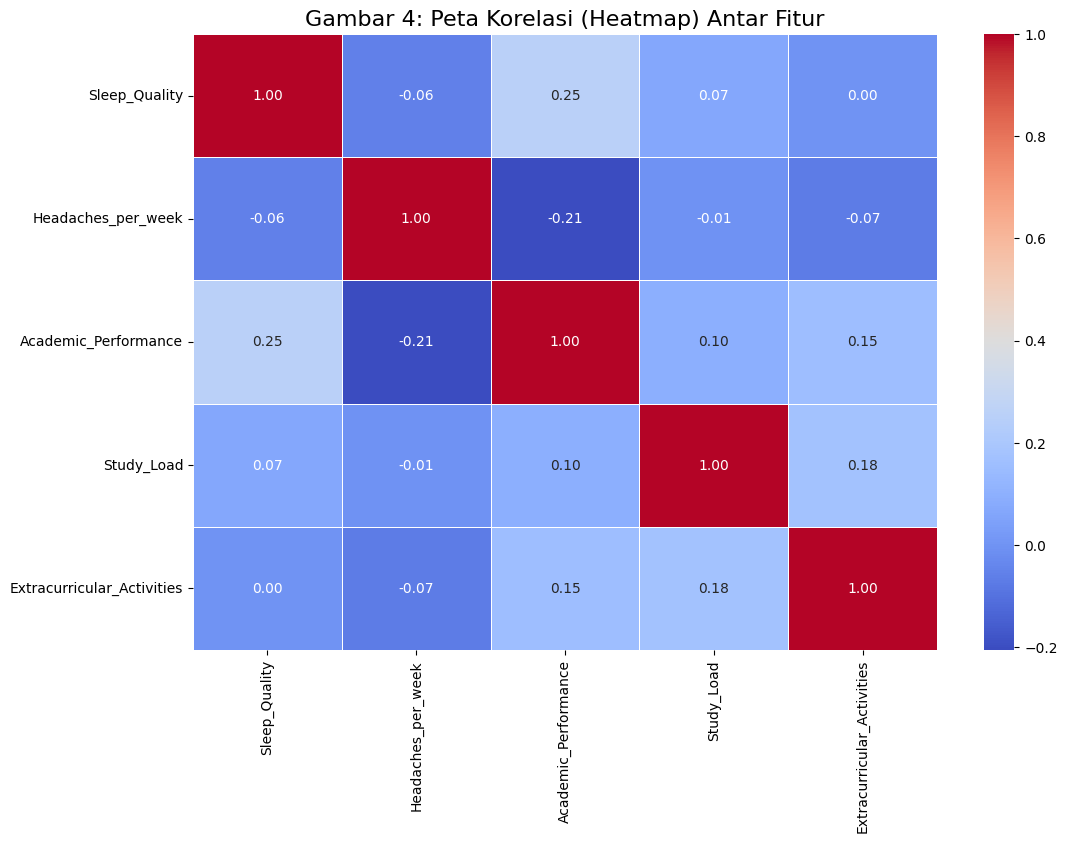


--- SELESAI ANALISIS DATA EKSPLORATIF (EDA) ---

--- Memulai Preprocessing Data untuk Model ---
Data train: (416, 5), Data test: (104, 5)

--- Memulai Tahap 1: Tuning Model ---
Tuning Logistic Regression...
LogReg Tuned. Best CV Score: 0.5674
Tuning Random Forest...
RF Tuned. Best CV Score: 0.9400
Tuning SVM...
SVM Tuned. Best CV Score: 0.9328

--- Memulai Tahap 2: Membuat Ensemble 'Super Model' (Voting) ---
Melatih Super Model (Voting)...
Super Model (Voting) selesai dilatih.

--- Hasil Evaluasi Akhir di Data Test ---
[UNTUK TABEL 3: Perbandingan Akurasi Model di Data Test]
Akurasi Logistic Regression: 0.6827
Akurasi Random Forest: 0.9423
Akurasi SVM: 0.9423
Akurasi SUPER MODEL (Voting): 0.9423

MODEL TERBAIK ADALAH: Random Forest
SELAMAT! TARGET > 90% TERCAPAI! Akurasi Tertinggi: 0.9423

[UNTUK TABEL 4: Laporan Klasifikasi untuk Random Forest]
                  precision    recall  f1-score   support

Stres Rendah (0)       1.00      0.91      0.95        68
Stres Tinggi (1)       0

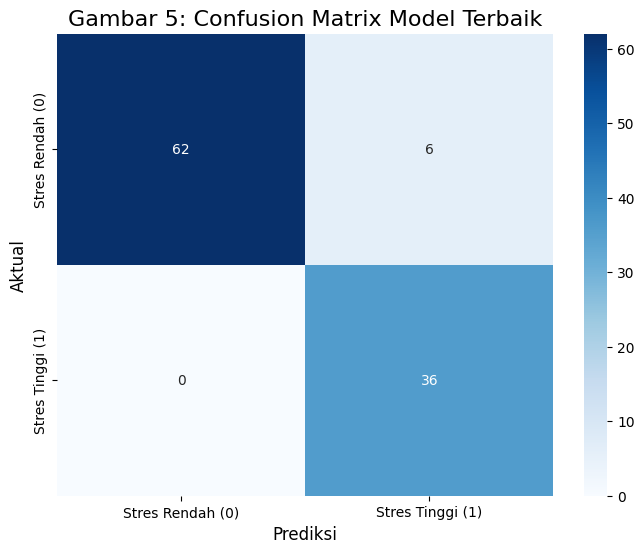


Model terbaik (Random Forest) telah disimpan sebagai 'model_stres_dataset_baru.joblib'
PROSES NOTEBOOK SELESAI.


In [ ]:
# BAGIAN 1: IMPORT SEMUA LIBRARY
import pandas as pd
import joblib

# Untuk visualisasi (membuat gambar/plot)
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk Model Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Mengabaikan peringatan agar output bersih
import warnings
warnings.filterwarnings('ignore')

print("Semua library berhasil dimuat.")

# ----------------------------------------------------
# BAGIAN 2: MEMUAT DATASET
# ----------------------------------------------------
try:
    # Pastikan file 'Student Stress Factors_2.csv' ada di folder yang sama
    df = pd.read_csv("Student Stress Factors_2.csv")
    
    # Beri nama kolom yang bersih
    new_column_names = [
        'Sleep_Quality', 
        'Headaches_per_week', 
        'Academic_Performance', 
        'Study_Load', 
        'Extracurricular_Activities', 
        'Stress_Level'
    ]
    
    if len(df.columns) == len(new_column_names):
        df.columns = new_column_names
        print("Berhasil mengganti nama kolom.")
    else:
        print("Error: Jumlah kolom tidak cocok.")
        raise ValueError("Jumlah kolom tidak cocok")

except FileNotFoundError:
    print(f"Error: File 'Student Stress Factors_2.csv' tidak ditemukan.")
except Exception as e:
    print(f"Error terjadi: {e}")


# ----------------------------------------------------
# BAGIAN 3: ANALISIS DATA EKSPLORATIF (EDA)
# ----------------------------------------------------

print("\n--- MULAI ANALISIS DATA EKSPLORATIF (EDA) ---")

# --- TABEL 1: CONTOH DATA AWAL ---
# (Screenshot output ini untuk Tabel 1 di laporan Anda)
print("\n[UNTUK TABEL 1: Contoh 5 Baris Data Awal]")
print(df.head())

# --- REKAYASA TARGET (UNTUK MODEL) ---
# Ini penting untuk model > 90%
target_col = 'Stress_Level'
df['target_biner'] = df[target_col].apply(lambda x: 1 if x >= 4 else 0)

# --- TABEL 2: CONTOH DATA SETELAH REKAYASA TARGET ---
# (Screenshot output ini untuk Tabel 2 di laporan Anda)
print("\n[UNTUK TABEL 2: Contoh 5 Baris Data (Setelah Rekayasa Target)]")
print(df.head())

# --- GAMBAR 1: Distribusi Target Asli (5 Kelas) ---
print("\nMembuat Gambar 1: Distribusi Target Asli...")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Stress_Level', palette='viridis')
plt.title('Gambar 1: Distribusi Target Asli (Level Stres 1-5)', fontsize=16)
plt.xlabel('Level Stres', fontsize=12)
plt.ylabel('Jumlah Responden', fontsize=12)
plt.show() # Ini akan menampilkan plot di notebook Anda

# --- GAMBAR 2: Distribusi Target Biner (2 Kelas) ---
print("\nMembuat Gambar 2: Distribusi Target Biner (Untuk Model)...")
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='target_biner', palette='Paired')
plt.title('Gambar 2: Distribusi Target Biner (Untuk Model)', fontsize=16)
plt.xlabel('Kelas Target Biner (0 = Rendah/Normal, 1 = Tinggi)', fontsize=12)
plt.ylabel('Jumlah Responden', fontsize=12)
plt.show() # Ini akan menampilkan plot di notebook Anda

# Definisikan X (fitur) di sini HANYA untuk EDA
X_fitur_eda = df.drop(columns=['Stress_Level', 'target_biner'])

# --- GAMBAR 3: Histogram Fitur Numerik ---
print("\nMembuat Gambar 3: Histogram untuk setiap fitur...")
X_fitur_eda.hist(bins=10, figsize=(15, 10), layout=(2, 3), color='blue', alpha=0.7)
plt.suptitle('Gambar 3: Histogram untuk Setiap Fitur Numerik', fontsize=16, y=1.02)
plt.tight_layout()
plt.show() # Ini akan menampilkan plot di notebook Anda

# --- GAMBAR 4: Peta Korelasi (Heatmap) Fitur ---
print("\nMembuat Gambar 4: Peta Korelasi (Heatmap) Fitur...")
plt.figure(figsize=(12, 8))
sns.heatmap(X_fitur_eda.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Gambar 4: Peta Korelasi (Heatmap) Antar Fitur', fontsize=16)
plt.show() # Ini akan menampilkan plot di notebook Anda

print("\n--- SELESAI ANALISIS DATA EKSPLORATIF (EDA) ---")


# ----------------------------------------------------
# BAGIAN 4: PREPROCESSING DATA UNTUK MODEL
# ----------------------------------------------------
print("\n--- Memulai Preprocessing Data untuk Model ---")

# Tentukan Fitur (X) dan Target (y) BARU
X = df.drop(columns=[target_col, 'target_biner'])
y = df['target_biner']

# Definisikan 5 fitur numerik kita
numeric_features = list(X.columns)

# Buat pipeline preprocessing:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Gabungkan dalam ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ],
    remainder='passthrough'
)

# Bagi Data (Train 80%, Test 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Data train: {X_train.shape}, Data test: {X_test.shape}")


# ----------------------------------------------------
# BAGIAN 5: TUNING MODEL
# ----------------------------------------------------
print("\n--- Memulai Tahap 1: Tuning Model ---")
# Kita pakai class_weight='balanced' untuk menangani data imbalanced

# LogReg Grid
pipe_logreg = Pipeline([
    ('preprocessor', preprocessor), 
    ('classifier', LogisticRegression(random_state=42, max_iter=1000, solver='liblinear', class_weight='balanced'))
])
param_logreg = {'classifier__C': [0.01, 0.1, 1.0, 10, 50]}
print("Tuning Logistic Regression...")
grid_logreg = GridSearchCV(pipe_logreg, param_logreg, cv=5, scoring='accuracy', n_jobs=-1).fit(X_train, y_train)
print(f"LogReg Tuned. Best CV Score: {grid_logreg.best_score_:.4f}")

# RF Grid
pipe_rf = Pipeline([
    ('preprocessor', preprocessor), 
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])
param_rf = {'classifier__n_estimators': [100, 200, 300], 'classifier__max_depth': [10, 20]}
print("Tuning Random Forest...")
grid_rf = GridSearchCV(pipe_rf, param_rf, cv=5, scoring='accuracy', n_jobs=-1).fit(X_train, y_train)
print(f"RF Tuned. Best CV Score: {grid_rf.best_score_:.4f}")

# SVM Grid
pipe_svm = Pipeline([
    ('preprocessor', preprocessor), 
    ('classifier', SVC(probability=True, random_state=42, class_weight='balanced'))
])
param_svm = {'classifier__C': [0.1, 1.0, 10, 50], 'classifier__gamma': ['scale', 'auto'], 'classifier__kernel': ['rbf', 'linear']}
print("Tuning SVM...")
grid_svm = GridSearchCV(pipe_svm, param_svm, cv=5, scoring='accuracy', n_jobs=-1).fit(X_train, y_train)
print(f"SVM Tuned. Best CV Score: {grid_svm.best_score_:.4f}")


# ----------------------------------------------------
# BAGIAN 6: MEMBUAT ENSEMBLE VOTING
# ----------------------------------------------------
print("\n--- Memulai Tahap 2: Membuat Ensemble 'Super Model' (Voting) ---")

# Ambil model-model terbaik dari hasil tuning
clf_logreg = grid_logreg.best_estimator_
clf_rf = grid_rf.best_estimator_
clf_svm = grid_svm.best_estimator_

# Gabungkan 3 model
voting_clf = VotingClassifier(
    estimators=[
        ('logreg', clf_logreg), 
        ('svm', clf_svm), 
        ('rf', clf_rf)
    ],
    voting='soft'
)

print("Melatih Super Model (Voting)...")
voting_clf.fit(X_train, y_train)
print("Super Model (Voting) selesai dilatih.")


# ----------------------------------------------------
# BAGIAN 7: EVALUASI AKHIR & SIMPAN MODEL
# ----------------------------------------------------
print("\n--- Hasil Evaluasi Akhir di Data Test ---")

all_models = {
    "Logistic Regression": clf_logreg,
    "Random Forest": clf_rf,
    "SVM": clf_svm,
    "SUPER MODEL (Voting)": voting_clf
}

best_model_name = ""
best_model_obj = None
best_accuracy = 0.0

# --- TABEL 3: PERBANDINGAN AKURASI ---
# (Screenshot output ini untuk Tabel 3 di laporan Anda)
print("[UNTUK TABEL 3: Perbandingan Akurasi Model di Data Test]")
for name, model in all_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Akurasi {name}: {accuracy:.4f}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name
        best_model_obj = model

print(f"\n========================================================")
print(f"MODEL TERBAIK ADALAH: {best_model_name}")
if best_accuracy > 0.90:
    print(f"SELAMAT! TARGET > 90% TERCAPAI! Akurasi Tertinggi: {best_accuracy:.4f}")
else:
    print(f"TARGET > 90% BELUM TERCAPAI. Akurasi Tertinggi: {best_accuracy:.4f}")
print(f"========================================================")

# --- TABEL 4: LAPORAN KLASIFIKASI ---
# (Screenshot output ini untuk Tabel 4 di laporan Anda)
print(f"\n[UNTUK TABEL 4: Laporan Klasifikasi untuk {best_model_name}]")
y_pred_best = best_model_obj.predict(X_test)
print(classification_report(y_test, y_pred_best, target_names=['Stres Rendah (0)', 'Stres Tinggi (1)']))


# --- GAMBAR 5: CONFUSION MATRIX ---
# (Screenshot plot ini untuk Gambar 5 di laporan Anda)
print("\nMembuat Gambar 5: Confusion Matrix Model Terbaik...")
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Stres Rendah (0)', 'Stres Tinggi (1)'], 
            yticklabels=['Stres Rendah (0)', 'Stres Tinggi (1)'])
plt.title('Gambar 5: Confusion Matrix Model Terbaik', fontsize=16)
plt.ylabel('Aktual', fontsize=12)
plt.xlabel('Prediksi', fontsize=12)
plt.show() # Ini akan menampilkan plot di notebook Anda


# ----------------------------------------------------
# BAGIAN 8: SIMPAN MODEL FINAL UNTUK DEPLOYMENT
# ----------------------------------------------------
model_filename = 'model_stres_dataset_baru.joblib' 
joblib.dump(best_model_obj, model_filename)
print(f"\nModel terbaik ({best_model_name}) telah disimpan sebagai '{model_filename}'")
print("PROSES NOTEBOOK SELESAI.")